In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
%matplotlib inline

In [6]:
from __future__ import division

In [7]:
#Provides an API to make HTTP Requests
import requests
try:
    from StringIO import StringIO
except:
    from io import StringIO

In [8]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
#Use Requests to get the information in text
source = requests.get(url).text
#Use StringIO to avoid an IO error with pandas 
poll_data = StringIO(source)

In [9]:
poll_df = pd.read_csv(poll_data)

In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [11]:
poll_df.info

<bound method DataFrame.info of                                 Pollster  Start Date    End Date  \
0              Politico/GWU/Battleground  2012-11-04  2012-11-05   
1                       YouGov/Economist  2012-11-03  2012-11-05   
2                       Gravis Marketing  2012-11-03  2012-11-05   
3                               IBD/TIPP  2012-11-03  2012-11-05   
4                              Rasmussen  2012-11-03  2012-11-05   
5                   JZ Analytics/Newsmax  2012-11-03  2012-11-05   
6                             UPI/CVOTER  2012-11-03  2012-11-05   
7                    Ipsos/Reuters (Web)  2012-11-01  2012-11-05   
8                                    ARG  2012-11-02  2012-11-04   
9    PPP (D-Americans United for Change)  2012-11-02  2012-11-04   
10                                   CNN  2012-11-02  2012-11-04   
11                              ABC/Post  2012-11-01  2012-11-04   
12                                Gallup  2012-11-01  2012-11-04   
13              

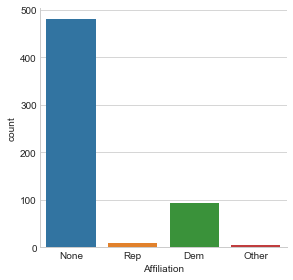

In [12]:
sns.factorplot('Affiliation',data=poll_df,kind = 'count')

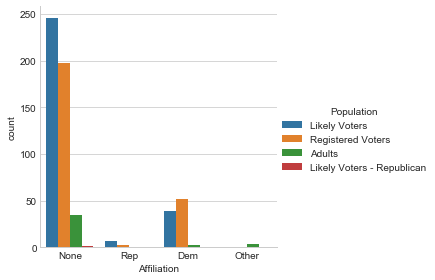

In [13]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind = 'count')

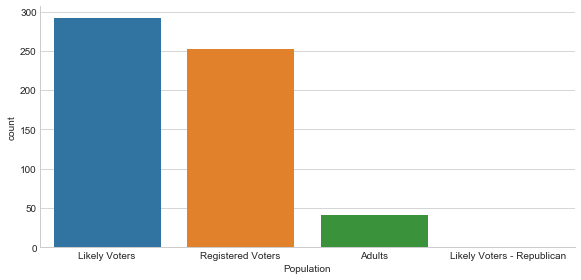

In [14]:
sns.factorplot('Population',data=poll_df,kind='count',aspect =2)

In [15]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [16]:
avg = pd.DataFrame(poll_df.mean())
#Since Averages are calculated only for numeric values
#Only four columns in above dataframe give the average
avg.head()
#Number of Observations,
#percentage of People supporting below candidates
#Obama,Romney,undecided,other

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [17]:
avg.drop('Number of Observations',axis = 0,inplace=True)

In [18]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [19]:
#Get the standard Deviation of all the columns
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis = 0,inplace = True)

In [20]:
std.drop('Question Text',axis = 0,inplace = True)

In [21]:
std.drop('Other',axis = 0,inplace = True)

In [22]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Question Iteration,0.000000


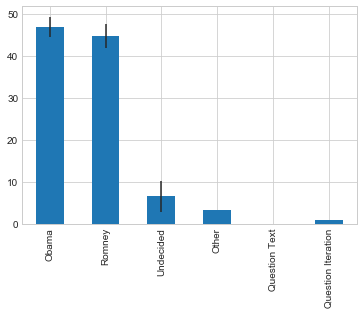

In [23]:
avg.plot(yerr=std,kind = 'bar',legend = False)

In [24]:
poll_avg = pd.concat([avg,std],axis=1)

In [25]:
poll_avg

,0,0
Obama,46.805461,2.422058
Other,3.376238,NaN
Question Iteration,1.000000,0.000000
Question Text,NaN,NaN
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [26]:
poll_avg.columns = ['Average','Std']

In [27]:
poll_avg

,Average,Std
Obama,46.805461,2.422058
Other,3.376238,NaN
Question Iteration,1.000000,0.000000
Question Text,NaN,NaN
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


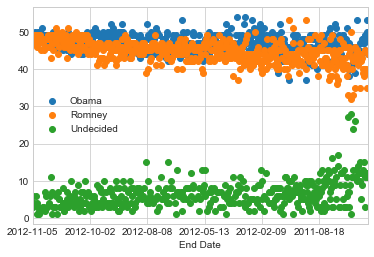

In [28]:
#At any given point of time how many percentage of people 
#voted for a particular candidate and how many were undecided voters

poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle ='',marker = 'o')

In [29]:
#Now let's check the trend of difference in votes amongst the two candidates
poll_df['diff_in_votes'] = poll_df['Obama']-poll_df['Romney']

In [30]:
poll_df.head()
#as_index = False means I don't want to keep Start Date as the index
#but original serial number as the index
#Group by Start Date 
#and take mean of all the numeric columns acc to start Date
poll_df = poll_df.groupby(['Start Date'],as_index = False).mean()

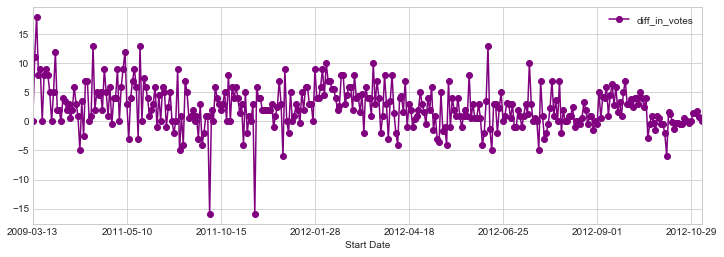

In [31]:
poll_df.head()
poll_df.plot('Start Date','diff_in_votes',figsize = (12,4),marker = 'o',linestyle = '-',color = 'purple')

In [32]:
row_in = 0
xlimit = []   
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


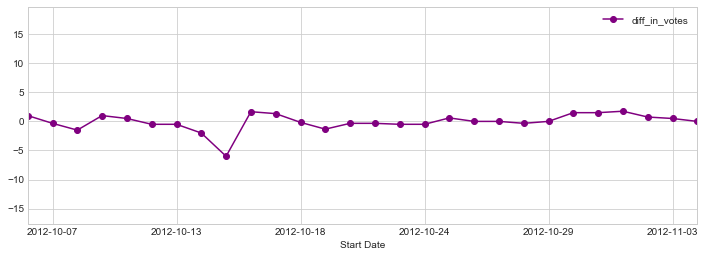

In [33]:
#get the xlimits between the month when the debates took place
#to see how voters sentiments changed after.
fig = poll_df.plot('Start Date','diff_in_votes',figsize = (12,4),marker = 'o',linestyle = '-',color = 'purple',xlim = (329,356))

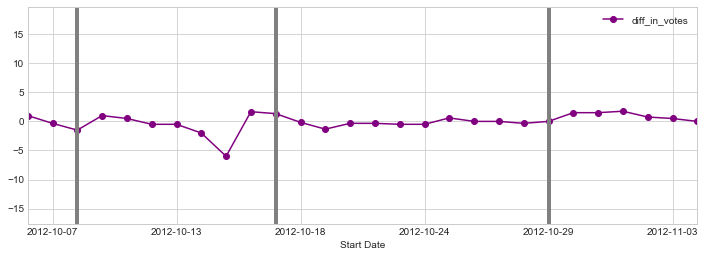

In [34]:
fig = poll_df.plot('Start Date','diff_in_votes',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))
#Plotting vertical lines 
#on days of debate i.e 2nd October, 11th october and 21st October
#and seeing how the voter sentiments change
plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')

In [35]:
donor_df = pd.read_csv('Election_Donor_Data.csv',low_memory = False)

In [36]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [37]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [38]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [42]:
#Average donation was 298$ 
donor_mean = donor_df['contb_receipt_amt'].mean()

In [43]:
donor_std = donor_df['contb_receipt_amt'].std()

In [44]:
print('The Average donation was %.2f with a std deviation %.2f'%(donor_mean,donor_std))

The Average donation was 298.24 with a std deviation 3749.67


In [45]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [49]:
#Here Top Donor Series contains negative values because of the refunds which are made
top_donor.sort_values().head()

114604   -30800.0
226986   -25800.0
101356    -7500.0
398429    -5500.0
250737    -5455.0
Name: contb_receipt_amt, dtype: float64

In [54]:
#Top 10 most common donation amounts
top_donor = top_donor[top_donor > 0]
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

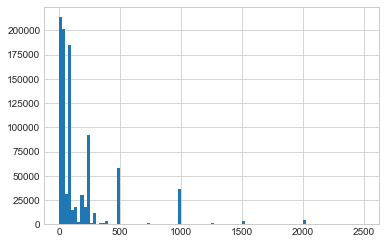

In [57]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)
#Contributors made more round off amount/value of donation

In [58]:
candidates = donor_df['cand_nm'].unique()

In [59]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [60]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [64]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [66]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [68]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [70]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [74]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount:
    print('The candidate %s raised %.0f dollars \n'%(cand_amount.index[i],don) )
    i += 1

The candidate Bachmann, Michelle raised 2711439 dollars 

The candidate Cain, Herman raised 7101082 dollars 

The candidate Gingrich, Newt raised 12832770 dollars 

The candidate Huntsman, Jon raised 3330373 dollars 

The candidate Johnson, Gary Earl raised 566962 dollars 

The candidate McCotter, Thaddeus G raised 39030 dollars 

The candidate Obama, Barack raised 135877427 dollars 

The candidate Paul, Ron raised 21009620 dollars 

The candidate Pawlenty, Timothy raised 6004819 dollars 

The candidate Perry, Rick raised 20305754 dollars 

The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 

The candidate Romney, Mitt raised 88335908 dollars 

The candidate Santorum, Rick raised 11043159 dollars 



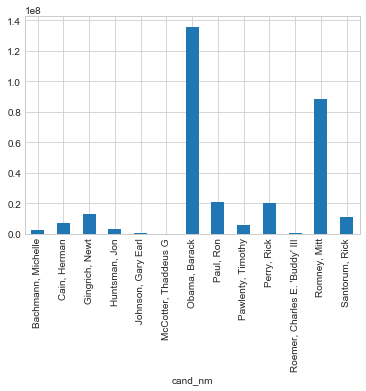

In [75]:
cand_amount.plot(kind = 'bar')

In [76]:
party_donation = donor_df.groupby('Party')['contb_receipt_amt'].sum()

In [77]:
party_donation

Party
Democrat      1.358774e+08
Republican    1.736539e+08
Name: contb_receipt_amt, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'head'

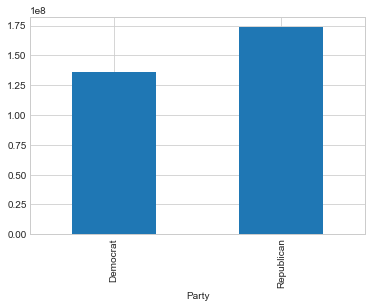

In [81]:
party_donation.plot(kind = 'bar')

In [82]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party',
                                    aggfunc = 'sum')

In [84]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [85]:
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [86]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45067 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
Democrat      29166 non-null float64
Republican    21081 non-null float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [90]:
occupation_df.shape

(45067, 2)

In [93]:
occupation_df = occupation_df[occupation_df.sum(1)>1000000]
occupation_df.shape

(31, 2)

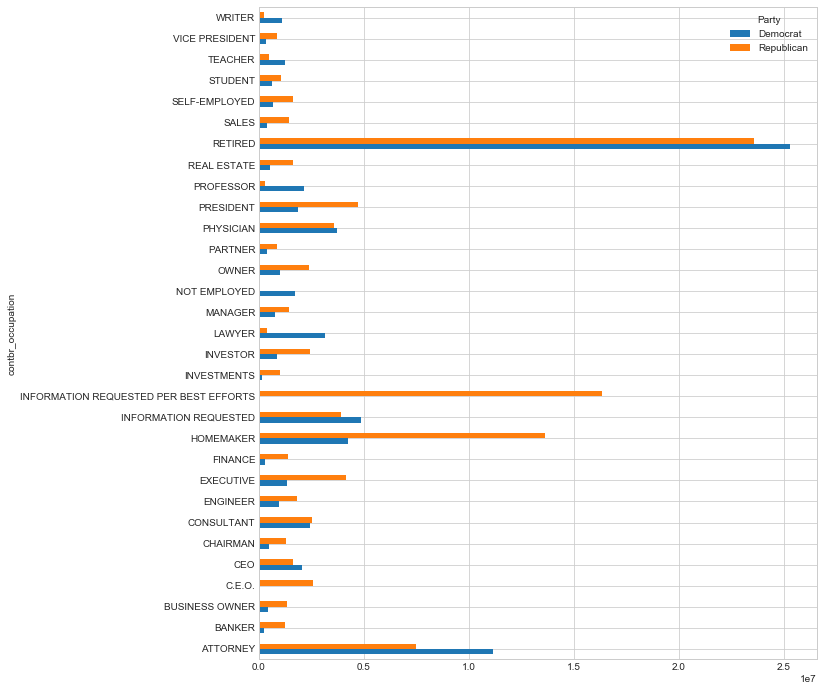

In [96]:
occupation_df.plot(kind='barh',figsize = (10,12))

In [97]:
#Dropping off the columns which don't provide job information
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis = 0, inplace =True)

In [100]:
#Merging CEO with C.E.O and dropping off C.E.O
occupation_df.loc['CEO'] = occupation_df.loc['CEO']+occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',inplace = True)

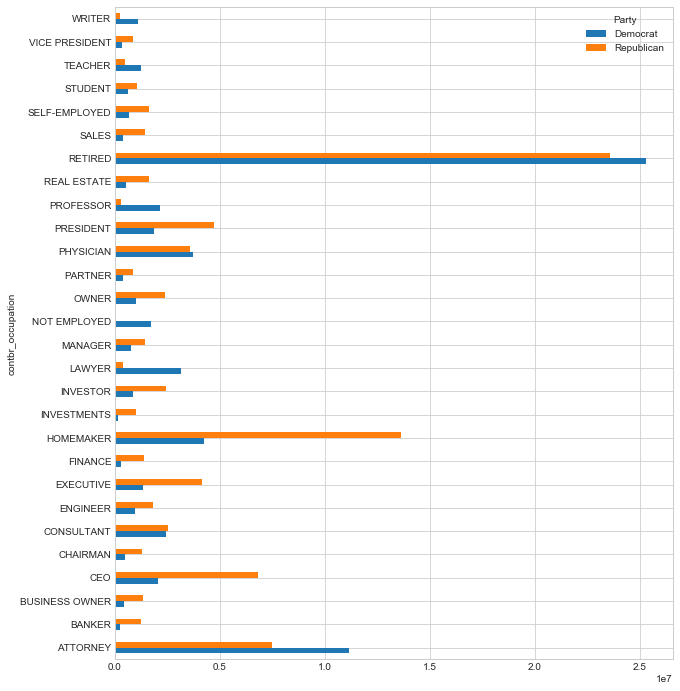

In [101]:
occupation_df.plot(kind='barh',figsize = (10,12))